# PHY 604: Homework #4 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<div style="background-color: powderblue; color: black; padding: 10px;">

_Convolutions_.  A convolution is defined as:
  \begin{equation}
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau
  \end{equation}
  It is easy to compute this with FFTs, via the _convolution theorem_,
  \begin{equation}
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}
  \end{equation}
  That is the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution
  in real space:
  \begin{equation}
    f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}

  <p>The file <tt>signal.txt</tt> in your git repo contains data of a
  function polluted with noise.  We want to remove the noise to
  recover the original function.  The three columns in the file are:
  $x$, $f^\mathrm{(orig)}(x)$, and $f^\mathrm{(noisy)}(x)$.

  Consider the following kernels:
    <ul>
      <li>Tophat: 
      \begin{equation}
        q^\mathrm{th}(x) = \begin{cases} 1/L & \mbox{if~} x < L \\ 0 & \mbox{if~
} x \ge L \end{cases}
      \end{equation}
       </li>
      <li>Gaussian:
      \begin{equation}
        q^\mathrm{gauss}(x) = \frac{1}{\sigma \sqrt{2 \pi}}\, e^{-\frac{1}{2} (x
/\sigma)^2}
      \end{equation}
       </li>
     </ul>
     
  <p>_For each of these kernels_, do the following:
  
  <p>**a.** Make the kernel periodic on the domain defined by the $x$ in
    the <tt>signal.txt</tt> file.  You can do this simply by left-right
    flipping the definitions above and applying them at the far end of
    the domain.

  <p>**b.** Normalize your kernel function by ensuring that it sums to $1$
    on the domain.

  <p>**c.** Plot the noisy function, $f^\mathrm{(noisy)}(x)$, and the kernel together.

  <p>**d.** Take the FFT of the $f^\mathrm{(noisy)}(x)$ and the FFT of the kernel an
d plot them.

  <p>**e.** Compute the convolution of $f^\mathrm{(noisy)}(x)$ and $q(x)$
    in Fourier space and transform back to real space, and plot the
    _de-noised_ function together with the original signal from
    the <tt>signal.txt</tt> (i.e., $f^\mathrm{(orig)}(x)$).

  <p>**f.** Experiment with the tunable parameters in the kernels ($L$ or $\sigma$)
    to see how clean you can get the noisy data and comment on what you see.
  

  <p>This process is used a lot in image processing both to remove noise
  and to compensate for the behavior of cameras to sharpen images.



</div>

Here's the main convolution routine.  It takes the data and a kernel and makes the plots asked for in the problem.

In [2]:
def do_convolve(x, signal, orig, kernel):

    N = len(x)

    fft_sig = np.fft.rfft(signal)
    nu_k = np.fft.rfftfreq(N)/(x[1] - x[0])

    fft_kernel = np.fft.rfft(kernel)


    plt.clf()

    plt.subplot(511)

    plt.plot(x, signal)
    plt.xlabel("x")
    plt.ylabel("f(x)")


    plt.subplot(512)

    plt.plot(nu_k, np.abs(fft_sig))
    plt.xlabel(r"$\nu_k$")
    plt.ylabel(r"$\mathcal{F}(f)$")


    plt.subplot(513)

    plt.plot(x, kernel)
    plt.xlabel("x")
    plt.ylabel("q(x)")


    plt.subplot(514)

    plt.plot(nu_k, np.abs(fft_kernel))
    plt.xlabel(r"$\nu_k$")
    plt.ylabel(r"$\mathcal{F}(q)$")

    plt.subplot(515)

    conv = fft_sig * fft_kernel
    f_conv = np.fft.irfft(conv)

    plt.plot(x, f_conv, label="convolved")
    plt.plot(x, orig, label="original")

    plt.xlabel("x")
    plt.ylabel(r"$f \circ q$")
    plt.legend(frameon=False)

    f = plt.gcf()
    f.set_size_inches(7.0, 10.0)
    plt.tight_layout()

Here are some kernels

In [3]:
def tophat(x, width=40):
    """ a tophat kernel """
    N = len(x)
    W = N//width
    th = np.ones(N)
    th[W:] = 0.0
    th[:W+1] /= W
    return th

def gaussian(x, sigma=0.5):
    """ a gaussian kernel """

    g = 1.0/(sigma*np.sqrt(2.0*np.pi))*np.exp(-0.5*(x/sigma)**2)
    g = g[:] + g[::-1]
    gsum = np.sum(g)
    return g/gsum

Let's read in the data:

In [4]:
data = np.loadtxt("signal.txt")

x = data[:,0]
signal = data[:,2]
orig = data[:,1]

Here's the tophat example:

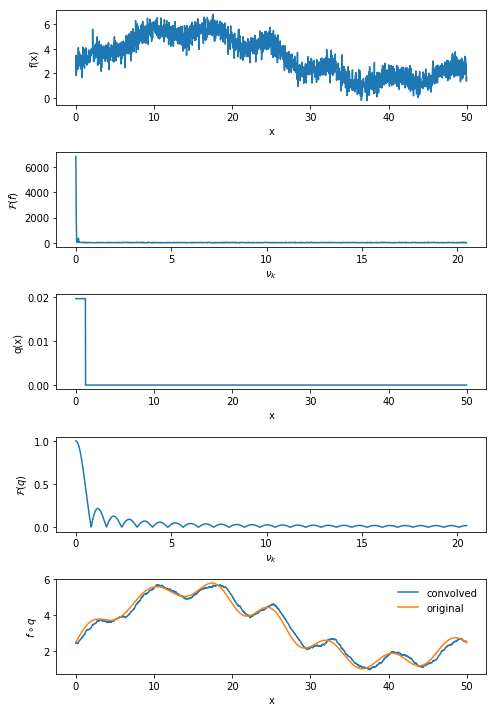

In [5]:
do_convolve(x, signal, orig, tophat(x))

Here's the Gaussian:

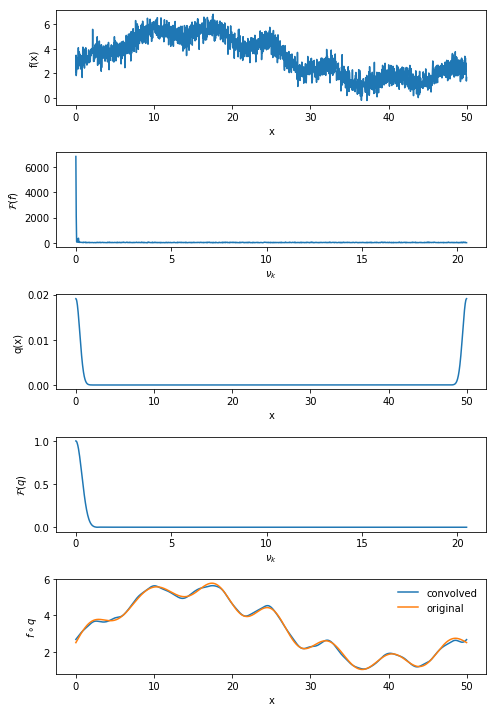

In [6]:
do_convolve(x, signal, orig, gaussian(x))